In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Desktop/Telecom_customer_churn.csv",skipinitialspace = True)  # Importing the data
pd.set_option('display.max_columns', 21)

In [3]:
df.head() # Checking frist five elements

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail() # Checking last five elements

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [5]:
df.shape # We have 908 rows and 25 coulmns

(7043, 21)

In [6]:
df.info() # We have some depreciated values in our data set and will take care of them later.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.nunique() # Checking how many unique properties each column has

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [8]:
df.isnull().sum() # Checking null values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

No data is missing

In [9]:
numerical_features = df.select_dtypes(exclude=['object']).copy()
print(numerical_features.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


We have four  numerical features


In [10]:
categorical_features = df.select_dtypes(include=['object']).copy()
print(categorical_features.columns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


These are our categorical features

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Confirming data types

In [12]:
df.drop(['customerID'], axis = 1, inplace = True)

Dropping customer ID as it is useless for our analysis

In [13]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Checking basic statistics of numeric data

### Performing EDA

<Figure size 432x288 with 0 Axes>

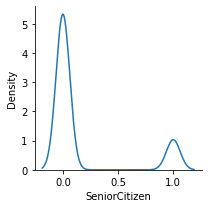

<Figure size 432x288 with 0 Axes>

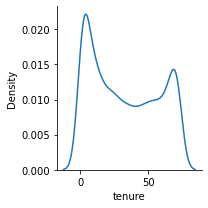

<Figure size 432x288 with 0 Axes>

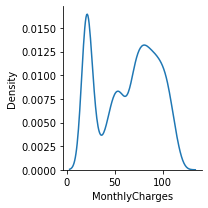

<Figure size 432x288 with 0 Axes>

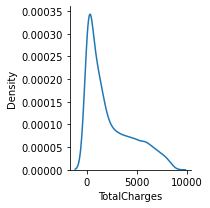

In [14]:
for col in df.select_dtypes(include=['float64','int64']):
    plt.figure()
    sns.displot(df[col],kind='kde',height=3)
    plt.show()

KDE plot of our numeric data


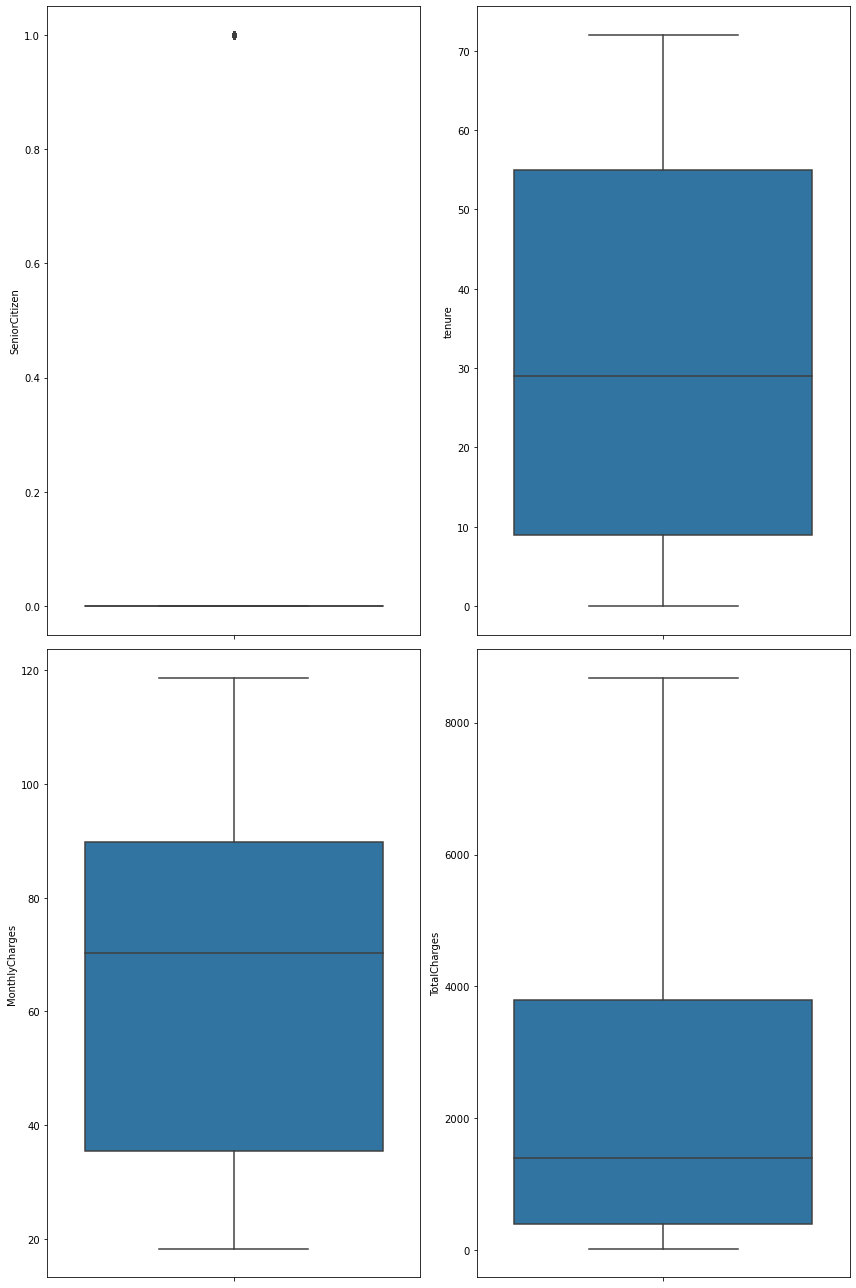

In [15]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(2,2,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

Box plot of numeric data, there are no outliers present here.

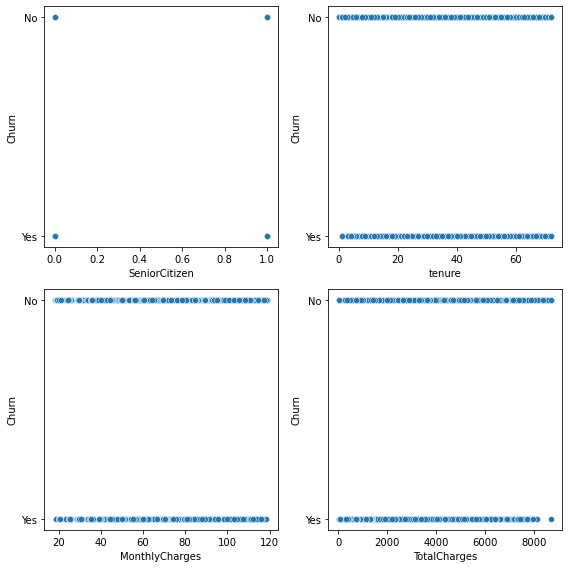

In [16]:
fig = plt.figure(figsize=(8,8))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(2, 2, i+1)
    sns.scatterplot(data = df, x= numerical_features.iloc[:, i],y=df['Churn'])
plt.tight_layout()
plt.show()

We can observe that churns are present in all ranges of data.

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

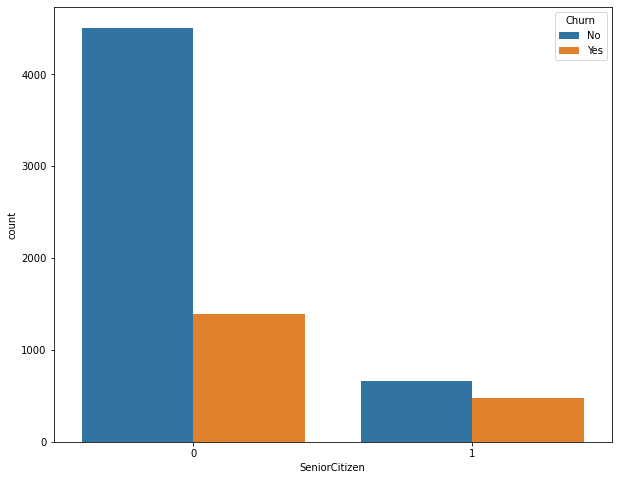

In [17]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x= df['SeniorCitizen'], hue=df['Churn'])

We can observer that almost half of senior citizens churn, this is most likely because they reach retirement age

<AxesSubplot:xlabel='gender', ylabel='count'>

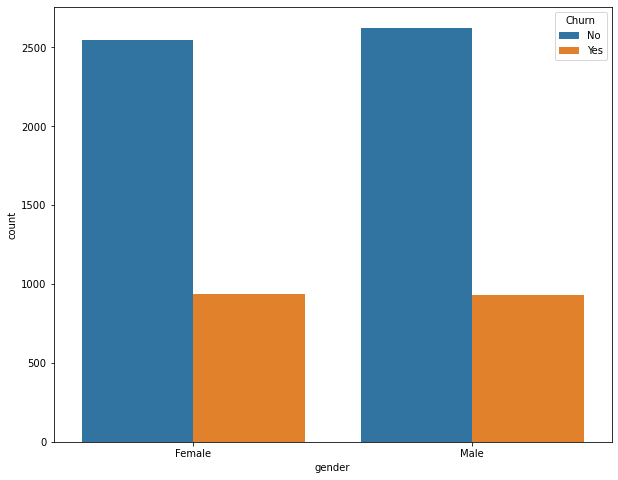

In [18]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x= df['gender'], hue=df['Churn'])

Doesn't seem to be an appreciable difference between male and female churns

<AxesSubplot:xlabel='Partner', ylabel='count'>

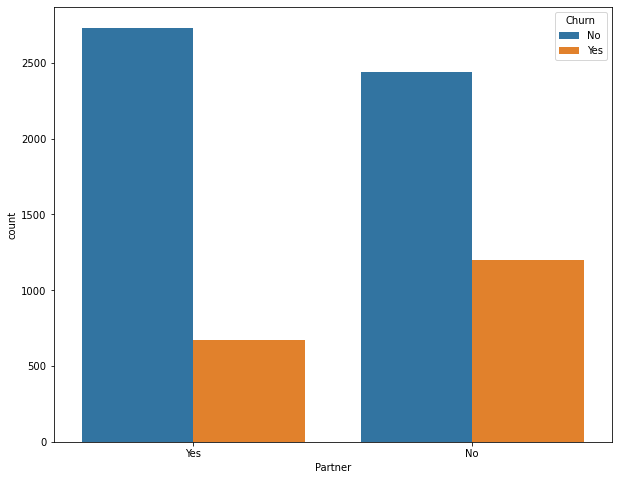

In [19]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x= df['Partner'], hue=df['Churn'])

People without a partner are more likely to churn their connection.

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

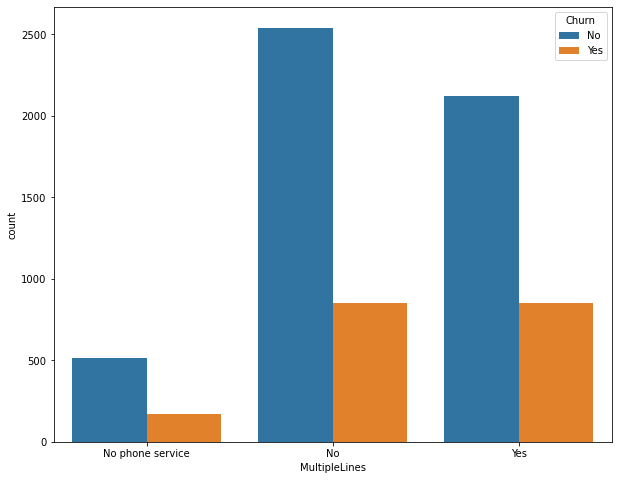

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x= df['MultipleLines'], hue=df['Churn'])

Proportionally there is no difference between these

<AxesSubplot:xlabel='InternetService', ylabel='count'>

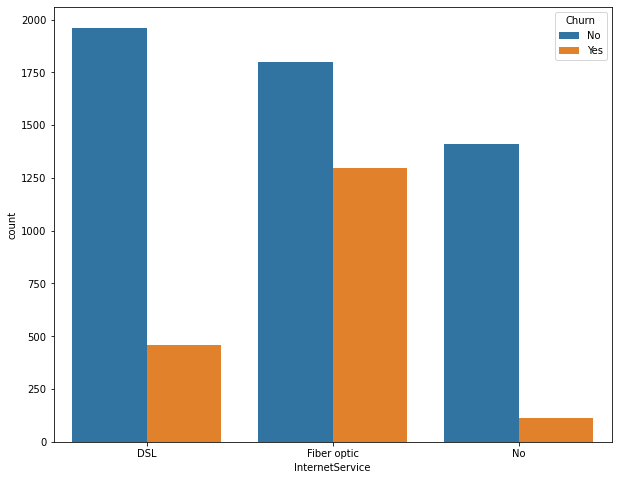

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x= df['InternetService'], hue=df['Churn'])

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

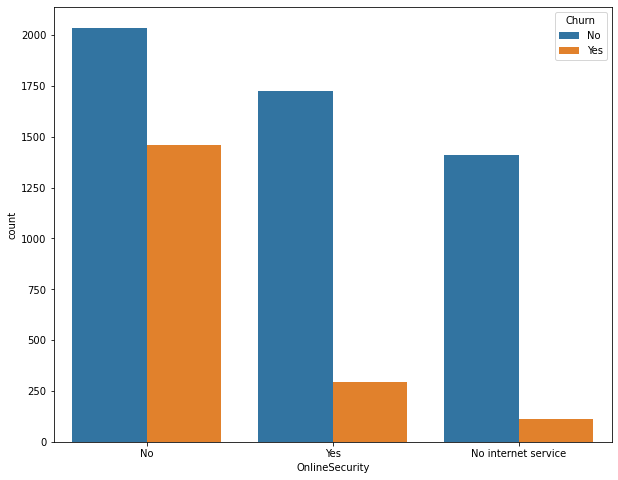

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x= df['OnlineSecurity'], hue=df['Churn'])

People without online security are highly likely to churn.

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

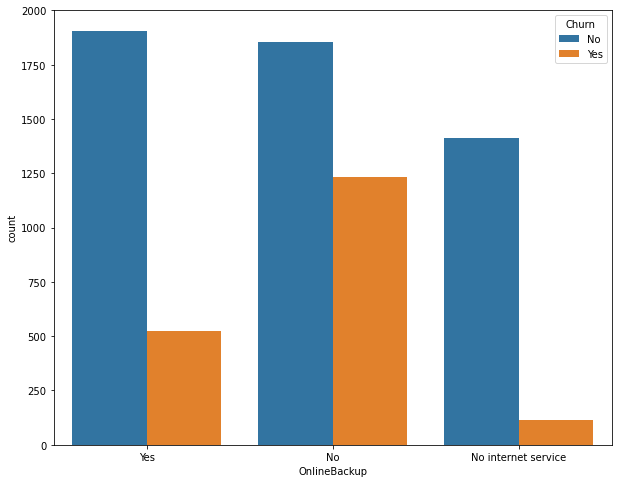

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x= df['OnlineBackup'], hue=df['Churn'])

People without a internet service don't churn as much.

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

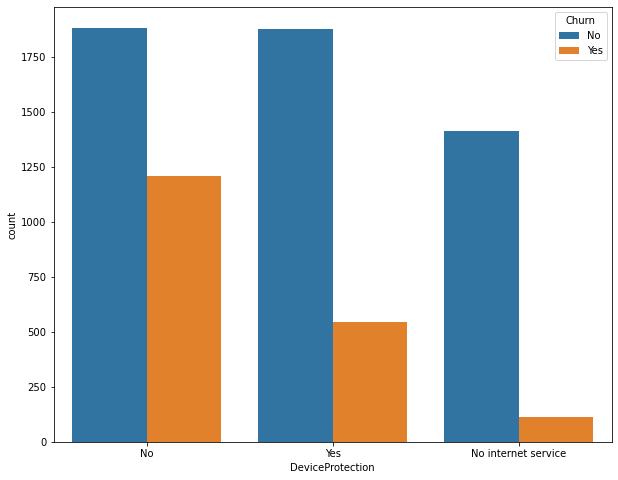

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x= df['DeviceProtection'], hue=df['Churn'])

People without device protection are highly likely to churn compared to people who have device protection/ no internet service.

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

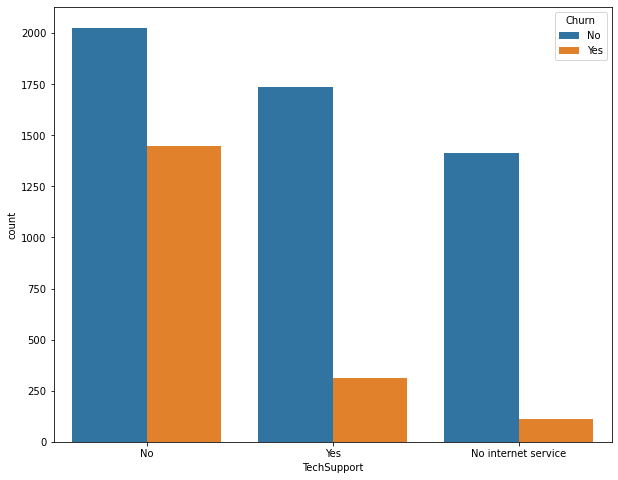

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x= df['TechSupport'], hue=df['Churn'])

As we can see if there is no technical support people are more likely to churn.

<AxesSubplot:xlabel='PhoneService', ylabel='count'>

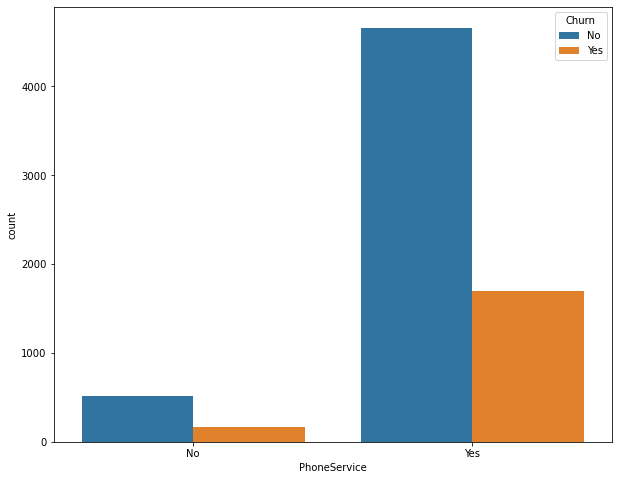

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x= df['PhoneService'], hue=df['Churn'])

People who have a phone service alone with tele com package are less likely to churn.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

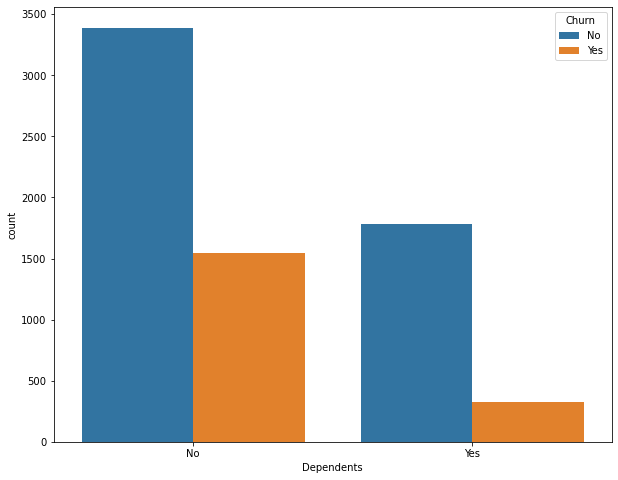

In [27]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x= df['Dependents'], hue=df['Churn'])

People who don't  have dependents are more likely to churn.

In [28]:
categorical_features.drop(['customerID'], axis = 1, inplace = True) # Dropping customer ID from categorical features.

##### Now performing EDA on categorical data

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

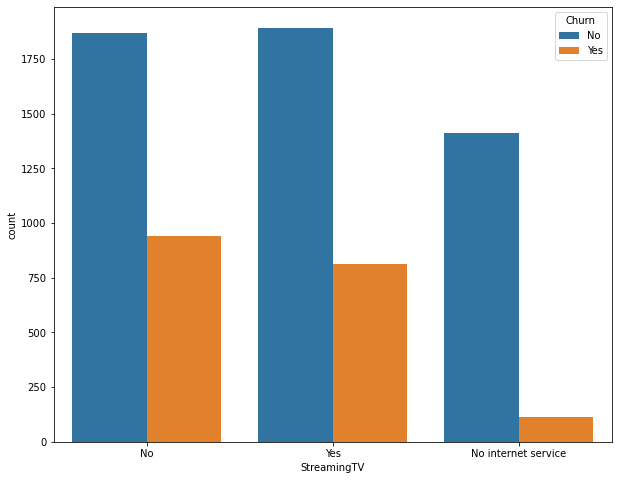

In [29]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x= df['StreamingTV'], hue=df['Churn'])

Having a streamign TV doesn't affect customer churn rates.

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

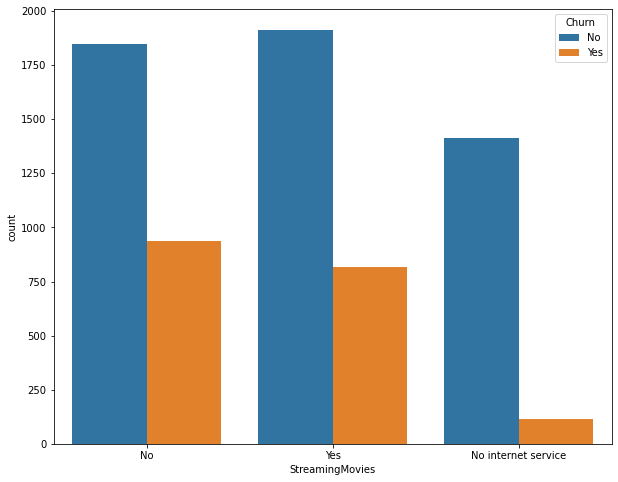

In [30]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x= df['StreamingMovies'], hue=df['Churn'])

As expected, people not streaming movies have a slightly higher churn rate compared to those who don't. 

<AxesSubplot:xlabel='Contract', ylabel='count'>

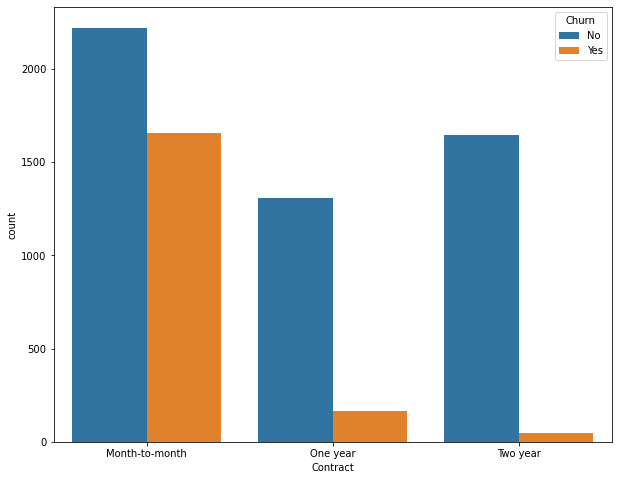

In [31]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x= df['Contract'], hue=df['Churn'])

Trend of time subscribed to contract length. As we can observe people who buy a plan monthly are very likely to churn compared to people who buy longer duration plans.

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

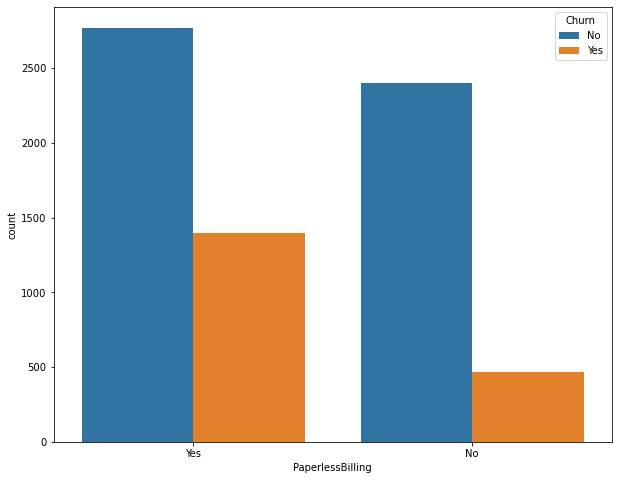

In [32]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x= df['PaperlessBilling'], hue=df['Churn'])

Online billing means it is easier to churn for the customer as they can just go to website and cancle.

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

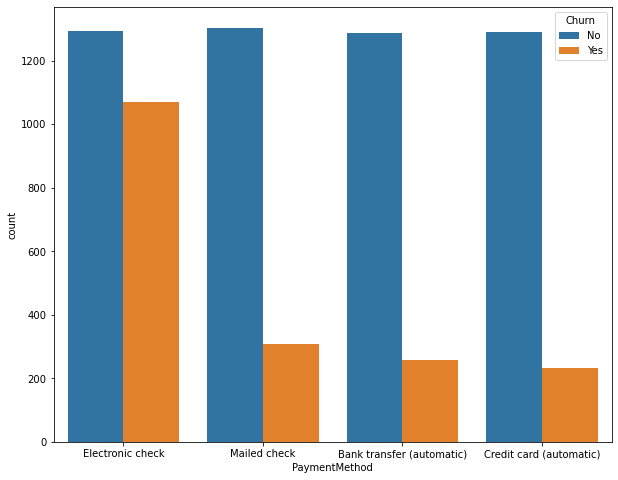

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(data = df, x= df['PaymentMethod'], hue=df['Churn'])

Churn rates compared to various payment methods.

In [34]:
categorical_features

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


Now performing box plot analysis on categorical data compared to monthly charges people face to check for outliers.

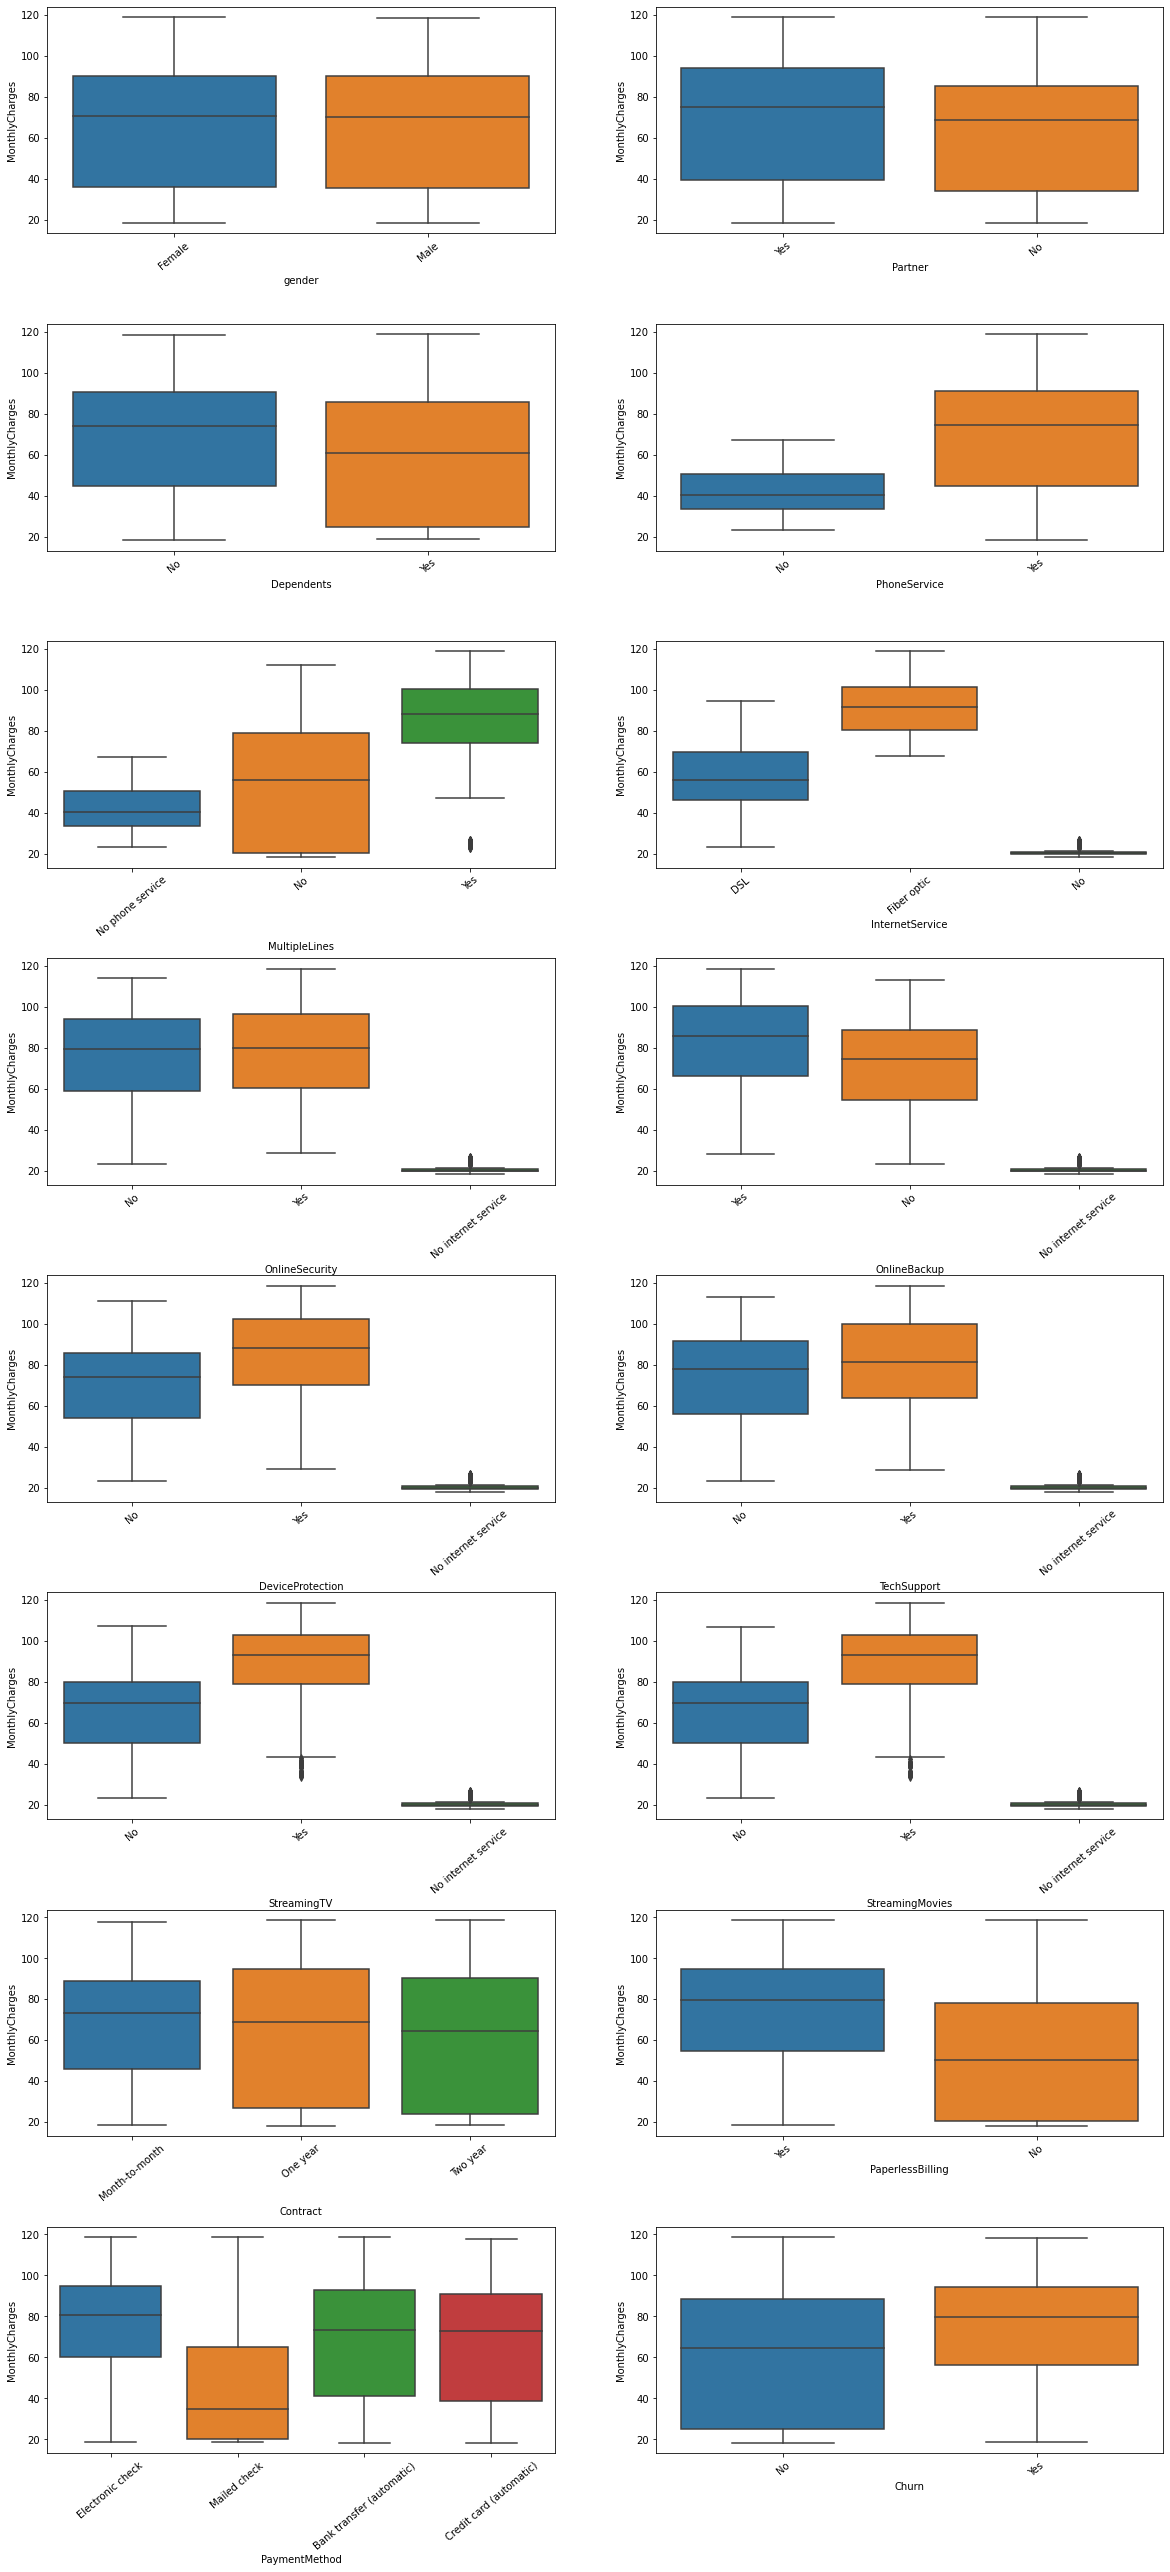

In [35]:
fig, ax = plt.subplots(8, 2, figsize=(20, 45))
for var, subplot in zip(categorical_features, ax.flatten()):
    sns.boxplot(x=var, y='MonthlyCharges', data=df, ax=subplot)
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    for label in subplot.get_xticklabels():
        label.set_rotation(40)

We can observer,
That people who churn are more likely to have a higher monthly charges.

### Multi variate analysis

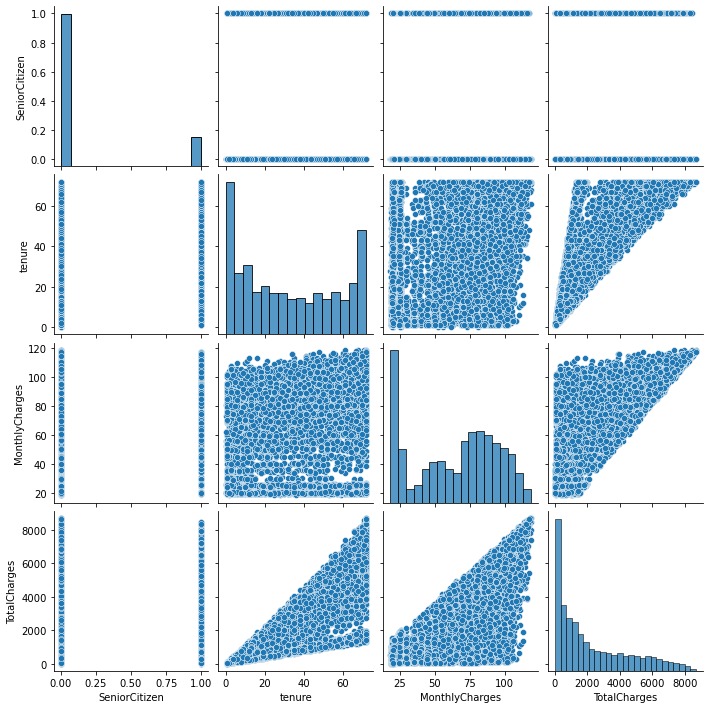

In [36]:
cont_col= ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'] 
sns.pairplot(df[cont_col])
plt.show()

We can observe various trends in these graphs.

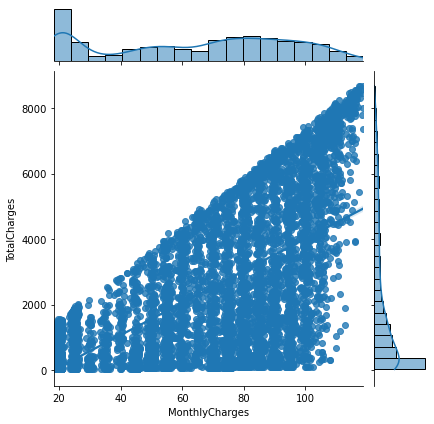

In [37]:
sns.jointplot(x=df.MonthlyCharges,y=df.TotalCharges, kind = "reg")   
plt.show()

Total charges is highly corelated with monthly charges.

In [38]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1}) # Now mapping 0 to no and 1 to yes

No handles with labels found to put in legend.


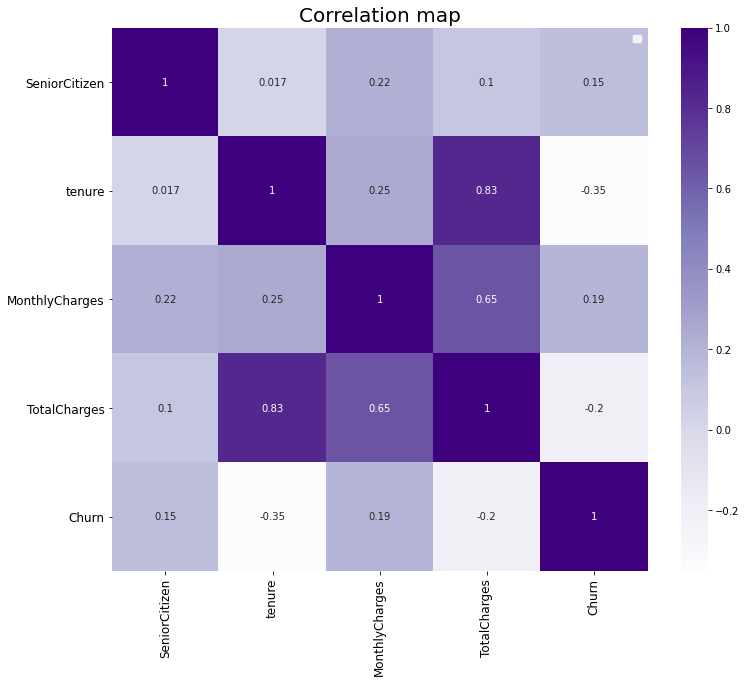

In [39]:
plt.figure(figsize = (12,10))
plt.title("Correlation map", fontsize = 20)
sns.heatmap(df.corr(), cmap = 'Purples', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 0)
plt.legend(fontsize=12)

Co-relation heatmap

As total charges is monthly charges multiplyed by tenure, I will now remove total charges.

In [40]:
df.drop(['TotalCharges'], axis = 1, inplace = True)

In [41]:
df.nunique() # Unuque values in our data, we can see most of it is categorical data.

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
Churn                  2
dtype: int64

In [42]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')

Encoding categorical data

In [43]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], handle_unknown='return_nan', return_df=True, use_cat_names=True)

These are the coulumns I will be encoding.

In [44]:
data_encoded = encoder.fit_transform(df)
data_encoded

,gender_Female,gender_Male,SeniorCitizen_0.0,SeniorCitizen_1.0,Partner_Yes,Partner_No,Dependents_No,Dependents_Yes,tenure,PhoneService_No,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaperlessBilling_No,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),MonthlyCharges,Churn
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,29.85,0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,34,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,56.95,0
2,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,2,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,53.85,1
3,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,45,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,42.30,0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,24,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,84.80,0
7039,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,72,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,103.20,0
7040,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,11,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,29.60,0
7041,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,4,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,74.40,1


Splitting data into training and targest variable.

In [45]:
X = data_encoded.drop(['Churn'],axis=1)
y = data_encoded['Churn']

#### Fixing class imbalance

In [46]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
Xo, yo = oversample.fit_resample(X, y)

<AxesSubplot:xlabel='Churn', ylabel='count'>

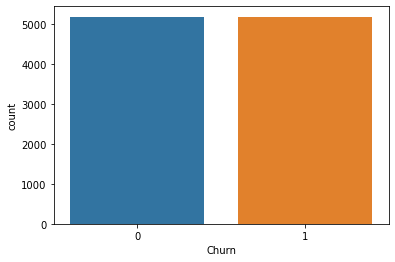

In [47]:
sns.countplot(x=yo)

Splitting the data

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size = 0.2, random_state = 5)
print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (8278, 45)
Y Train Shape  (8278,)
X Test Shape  (2070, 45)
Y Test Shape  (2070,)


Standardising data to remove bias

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Standardising the data

In [50]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [51]:
from sklearn.linear_model import LogisticRegression
from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn                        import metrics, svm
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report # Importing required libraries

### Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier(random_state=1)
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
dtr.score(X_test, y_test)

0.806280193236715

In [53]:
scr = cross_val_score(dtr, X,y, cv=5)
print(scr.mean())

0.7197238531518162


### Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(random_state=5)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.851207729468599

In [55]:
scr = cross_val_score(rfr, X,y, cv=5)
print(scr.mean())

0.7820548906381057


### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
llr = LogisticRegression()
llr.fit(X_train, y_train)
y_pred_rfr = llr.predict(X_test)
llr.score(X_test, y_test)

0.77487922705314

In [57]:
scr = cross_val_score(llr, X,y, cv=5)
print(scr.mean())

0.8012211473320858


### K-Neighbors Classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =15)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn.score(X_test, y_test)

0.7739130434782608

In [59]:
scr = cross_val_score(knn, X,y, cv=5)
print(scr.mean())

0.7839000701658172


### Gradient Boosting Classifier

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gba = GradientBoostingClassifier(random_state=1)
gba.fit(X_train, y_train)
y_pred_gba = gba.predict(X_test)
gba.score(X_test,y_test)

0.8603864734299517

In [61]:
scr = cross_val_score(gba, X,y, cv=5)
print(scr.mean())

0.8046289276727532


In [62]:
confusion_matrix(y_test, y_pred_gba)

array([[871, 160],
       [129, 910]], dtype=int64)

## Hyper paramter tuning

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
parameters = { 'loss' : ['deviance','exponential'],
               'learning_rate' : [0.1,0.123], 
              'n_estimators': [100,110],
              'criterion':['mse','mae']
}

In [65]:
GCV = GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [66]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['mse', 'mae'],
                         'learning_rate': [0.1, 0.123],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 110]})



In [67]:
GCV.best_params_ # These are the best params

{'criterion': 'mse',
 'learning_rate': 0.123,
 'loss': 'exponential',
 'n_estimators': 100}


In [68]:
mod = GradientBoostingClassifier(learning_rate= 0.123, loss ='exponential', n_estimators = 100, criterion='mse')
mod.fit(X_train,y_train)
pred = mod.predict(X_test)
mod.score(X_test,y_test)

0.8657004830917875

In [69]:
pd.DataFrame(confusion_matrix(y_test, pred), columns=['Predicted customer churn', "Predicted no customer churn"], index=['Actual churn', 'Actual no churn'])

,Predicted customer churn,Predicted no customer churn
Actual churn,882,149
Actual no churn,129,910


In [70]:
r_probs = [0 for _ in range(len(y_test))]
mod_probs = mod.predict_proba(X_test)

mod_probs = mod_probs[:, 1]

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score

r_auc = roc_auc_score(y_test, r_probs)
mod_auc = roc_auc_score(y_test, mod_probs)

In [72]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Gradient booster: AUROC = %.3f' % (mod_auc))

Random (chance) Prediction: AUROC = 0.500
Gradient booster: AUROC = 0.944


In [73]:
y_test = (y_test == 1).astype(int)
y_tesin = (y_train == 1).astype(int)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
mod_fpr, mod_tpr, _ = roc_curve(y_test, mod_probs)

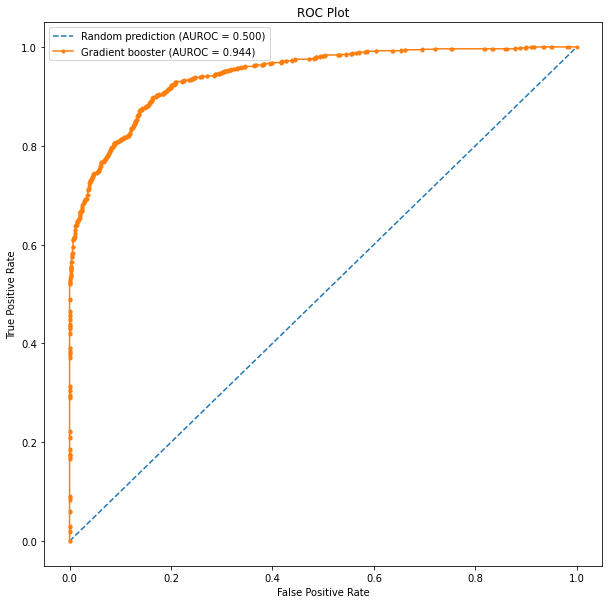

In [74]:
plt.subplots(1, figsize=(10,10))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(mod_fpr, mod_tpr, marker='.', label='Gradient booster (AUROC = %0.3f)' % mod_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot

plt.show()

AUROC score of 0.944

### Saving the model

In [75]:
import joblib
joblib.dump(mod,"CustomerChurn.pkl")

['CustomerChurn.pkl']